In [1]:
from shine import AdvectionSolver, initial_conditions
import matplotlib.pyplot as plt
from functools import partial
import numpy as np

In [2]:
def square(x, y, z, bounds=(0, 1)):
    return (bounds[1] - bounds[0]) * np.where(np.abs(x - 0.5) < 0.25, 1, 0) + bounds[0]


solver = AdvectionSolver(
    ic=partial(initial_conditions.sinus, vx=1),
    ic_passives={
        "passive1": square,
        "passive2": partial(square, bounds=(1.5, 2.5)),
        "passive3": partial(square, bounds=(-10, 10)),
    },
    nx=64,
    ny=1,
    nz=1,
    p=7,
)
_slc = solver.array_slicer

In [3]:
solver.run(1)

100%|██████████| 1.0/1.0 [00:00]                 


In [4]:
sorted(solver.timer.cum_time.items())

[('!FiniteVolumeSolver.run', 0.2803521156311035),
 ('!ODE_INT', 0.2666928768157959),
 ('?.snapshot', 1.430511474609375e-05),
 ('AdvectionSolver.compute_dt_and_fluxes', 0.21989774703979492),
 ('AdvectionSolver.get_dt', 0.015244245529174805),
 ('AdvectionSolver.upwinding_riemann_solver', 0.02781963348388672),
 ('ExplicitODESolver.integrate', 0.28032684326171875),
 ('FiniteVolumeSolver.compute_flux_integral', 0.004012346267700195),
 ('FiniteVolumeSolver.f', 0.22702956199645996),
 ('FiniteVolumeSolver.interpolate', 0.13574552536010742),
 ('FiniteVolumeSolver.interpolate_face_nodes', 0.13934111595153809)]

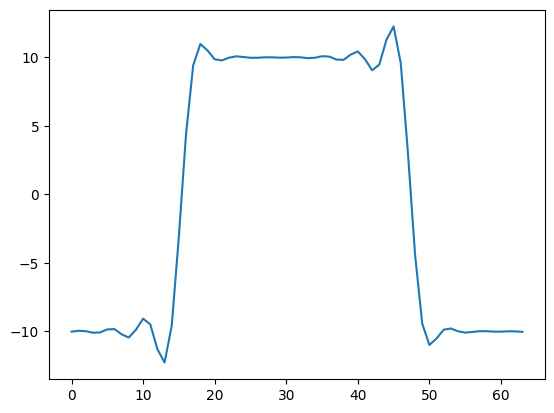

In [8]:
plt.plot(solver.arrays["y"][_slc("passive3"), :, 0, 0])

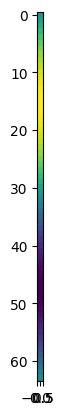

In [6]:
plt.imshow(solver.arrays["y"][0, :, :, 0])